In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('data/stud.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#X and Y
X=df.drop(columns=['math score'],axis=1)
y=df['math score']

In [7]:
#create columns transformer with 3 types of transformers
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_features=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_features,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [8]:
X=preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [9]:
#separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [10]:
def evalute_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_absolute_error(true,predicted))
    r2__score=r2_score(true,predicted)
    return mae,mse,rmse,r2__score

In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBoostRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evalute_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evalute_model(y_test, y_test_pred)

    # Store results
    model_name = list(models.keys())[i]
    print(model_name)
    model_list.append(model_name)
    r2_list.append(model_test_r2)

    print('Model performance for train set')
    print("MSE : {:.4f}".format(model_train_mse))
    print("RMSE : {:.4f}".format(model_train_rmse))
    print("MAE : {:.4f}".format(model_train_mae))
    print("R2_SCORE : {:.4f}".format(model_train_r2))

    print("------------------------------------------------")

    print('Model performance for test set')
    print("MSE : {:.4f}".format(model_test_mse))
    print("RMSE : {:.4f}".format(model_test_rmse))
    print("MAE : {:.4f}".format(model_test_mae))
    print("R2_SCORE : {:.4f}".format(model_test_r2))

    print('='*30)
    print('\n')


Linear Regression
Model performance for train set
MSE : 28.3349
RMSE : 2.0656
MAE : 4.2667
R2_SCORE : 0.8743
------------------------------------------------
Model performance for test set
MSE : 29.0952
RMSE : 2.0530
MAE : 4.2148
R2_SCORE : 0.8804


Lasso
Model performance for train set
MSE : 43.4784
RMSE : 2.2817
MAE : 5.2063
R2_SCORE : 0.8071
------------------------------------------------
Model performance for test set
MSE : 42.5064
RMSE : 2.2711
MAE : 5.1579
R2_SCORE : 0.8253


Ridge
Model performance for train set
MSE : 28.3378
RMSE : 2.0652
MAE : 4.2650
R2_SCORE : 0.8743
------------------------------------------------
Model performance for test set
MSE : 29.0563
RMSE : 2.0521
MAE : 4.2111
R2_SCORE : 0.8806


KNeighborsRegressor
Model performance for train set
MSE : 32.5776
RMSE : 2.1253
MAE : 4.5167
R2_SCORE : 0.8555
------------------------------------------------
Model performance for test set
MSE : 52.6066
RMSE : 2.3709
MAE : 5.6210
R2_SCORE : 0.7838


DecisionTreeRegressor


In [12]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,RandomForestRegressor,0.854187
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.847279
6,XGBoostRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,DecisionTreeRegressor,0.751457


In [14]:
rid_model=Ridge()
rid_model=rid_model.fit(X_train,y_train)
y_pred=rid_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.06


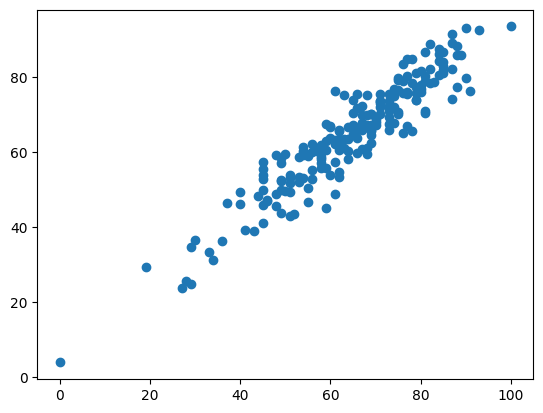

In [15]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='math score'>

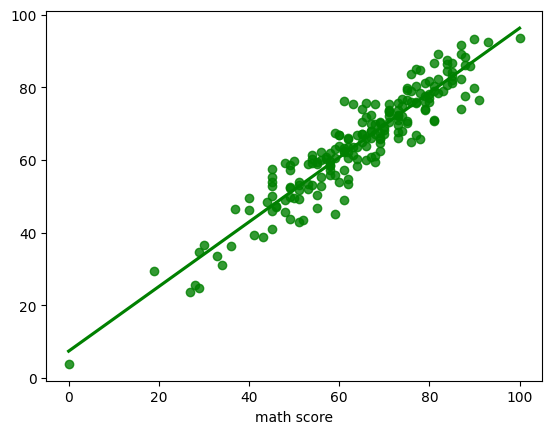

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=True,color='g')

In [ ]:
pred_df=pd.DataFrame({'Actual Value': y_test,
                      'Predicted Value': y_pred,
                      'Residual': y_test-y_pred}
                      )

pred_df

,Actual Value,Predicted Value,Residual
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
